## **PROJECT 1**
### In this project, we're exploring the "Movies" dataset to get the following insight
#### - *Which genres are most popular from year to year?*
#### - *What kinds of properties are associated with movies that have high revenues?*

In [3]:
# Importing the needed libraries
import pandas as pd 
import numpy as np 
import matplotlib 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [4]:
# Reading the 'movies' dataset
movies = pd.read_csv("tmdb-movies.csv")
pd.set_option('display.max_columns', None) # used to display all the columns without hidding any
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### **Data Wrangling**
#### - *Check the shape of the dataset*
#### - *Check the column label*
#### - *Get general information of the dataset*
#### - *Check for missing values*
#### - *Fill the needed missing values*
#### - *Check and drop duplicate rows*

In [5]:
# Checking the shape of the movies dataset
movies.shape 

(10866, 21)

In [6]:
# Checking if the columns are properly labelled
movies.columns 

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
# Checking the general info of the dataset
movies.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
# Checking for missing values
movies.isna().sum() 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# Filling the missing values in imdb_id column with "tt0411951"
movies["imdb_id"].fillna("tt0411951", inplace = True) 

In [12]:
# Filling the missing values in cast column with "Louis C.K."
movies["cast"].fillna("Louis C.K.", inplace = True) 

In [14]:
# Filling the missing values in homepage column with "http://www.thehungergames.movie/"
movies["homepage"].fillna("http://www.thehungergames.movie/", inplace = True) 

In [15]:
# Filling the missing values in director column with "Woody Allen"
movies["director"].fillna("Woody Allen", inplace = True) 

In [16]:
# Filling the missing values in tagline column with "Based on a true story."
movies["tagline"].fillna("Based on a true story.", inplace = True) 

In [17]:
# Filling the missing values in keywords column with "woman director"
movies["keywords"].fillna("woman director", inplace = True) 

In [18]:
# Filling the missing values in overview column with "No overview found."
movies["overview"].fillna("No overview found.", inplace = True) 

In [19]:
# Filling the missing values in production_companies column with "Paramount Pictures"
movies["production_companies"].fillna("Paramount Pictures", inplace = True) 

In [20]:
# Checking for duplicate rows
movies.duplicated(keep='first').sum() 

1

In [21]:
# Dropping the duplicates
movies.drop_duplicates(keep='first', inplace=True) 

In [22]:
# Confirming that duplicate rows are dropped
movies.duplicated(keep='first').sum() 

0

In [23]:
# value count for genres column
movies["genres"].value_counts() 

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

In [24]:
movies["genres"].fillna("Comedy", inplace = True) # filling the missing values with "Comedy" in genres column

In [25]:
a = movies.head()["genres"][0]    # used to get the first genre in the 
a.split("|")                      # used to split the combined genres
a.split("|")[0]                   # used to extract only the first type of genre

'Action'

In [26]:
#Defining a function that will iterate through the genres column and return the first genre type
def extract_function(z): 
    return z.split("|")[0] 

In [27]:
# Applying the function that will return the first genre type in the entire column
movies["genres"].apply(extract_function) 

0             Action
1             Action
2          Adventure
3             Action
4             Action
            ...     
10861    Documentary
10862         Action
10863        Mystery
10864         Action
10865         Horror
Name: genres, Length: 10865, dtype: object

In [28]:
movies["genres"] = movies["genres"].apply(extract_function) # Affecting what I've extracted in the "genres" column
movies.head() 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [29]:
# Confirming that there are no missing values
movies.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### **OBSERVATION**
#### *There are about **13,434** missing values in **9** coulmns in the entire dataset. After checking the whole missing values, I found it more interesting to fill them other than dropping. On the Genres column, I had to split and extract the first genre type as it has combination of genres. There was only **1** duplicate row so I dropped it.*

### **DATA EXPLORATION**
#### - *Checking for the most occuring genres*
#### - *Which genres are most popular from year to year?*
#### - *What kinds of properties are associated with movies that have high revenues?*

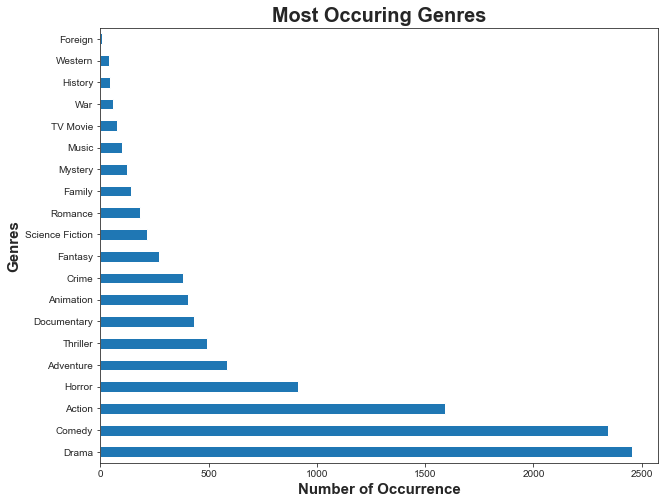

In [30]:
# Checking for the most occuring genres

fig = plt.figure(figsize =(10, 8))
movies['genres'].value_counts().plot(kind='barh') # used to pick the first 30 highest ranking/occuring genres.
plt.xlabel('Number of Occurrence', fontweight='bold', size=15)
plt.ylabel('Genres', fontweight='bold', size=15)
plt.title('Most Occuring Genres',fontweight='bold', size=20);

**Drama** *which is at the top, occured most about **2,453** times. Followed by **Comedy** about **2,342** times, and **Action** about **1,590** times. The rest are less than **1,000**. **Foreign** occured only **9** times as the least in the entire dataset.*

### **Which Genres Are Most Popular From Year To Year**

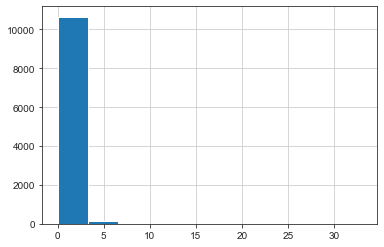

In [31]:
# Ploting a hist map to get more insight on the popularity of the dataset
movies.popularity.hist();

*Looking at popularity distribution. The major popularity fall between **1 to 3**, and a minor fraction between **4 to 6***

In [32]:
movies['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

In [71]:
# groupby year and get the largest value
movies.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)[:10]

# clean up the data by removing extra row index by reset index
movies_year = movies.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)

# change the pandas series to pandas dataframe
data = movies_year.reset_index()
data.head()

,release_year,genres,popularity
0,1960,Drama,0.687575
1,1961,Adventure,1.394596
2,1962,Adventure,1.283631
3,1963,Animation,2.180410
4,1964,Adventure,0.736431


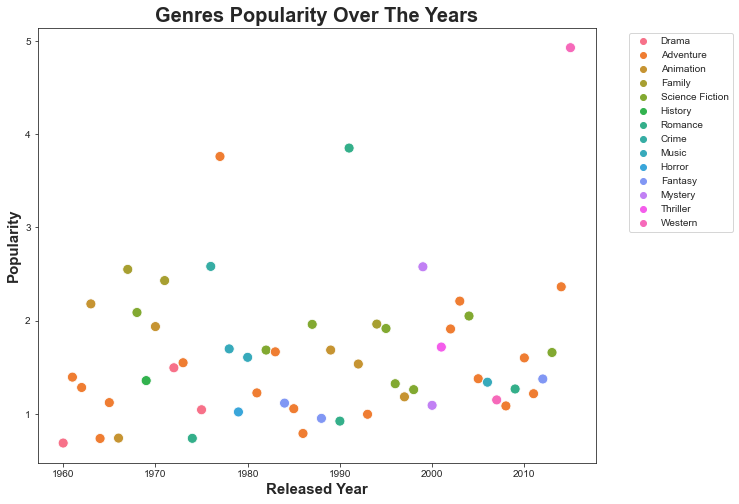

In [41]:
# set chart dimension
plt.figure(figsize=(10,8))

# set plotting style
sns.set_style('ticks')

# set title
plt.title('Genres Popularity Over The Years', fontweight='bold', size=20)
plt.xlabel('Released Year', fontweight='bold', size=15)
plt.ylabel('Popularity', fontweight='bold', size=15)

# draw scatter plot
sns.scatterplot(y= 'popularity', x="release_year", hue="genres", data=data, marker="o", s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5); # used to move the legend outside the chart

*This shows that Drama got more pupolarity from 2008 to 2015. History got most popularity from 1990 to 2001. While Adventure got the highest popularity from 1970 to 1978*

### **What Kinds Of Properties Are Associated With Movies That Have High Revenues**

*To get this, I will first consider the correlation between popularity, budget, runtime, genres, vote average, and release year*

In [43]:
info_rev = pd.DataFrame(movies['revenue'].sort_values(ascending=False))
data_set = ['popularity','budget','original_title','runtime','genres','vote_average','release_year']
for i in data_set:
    info_rev[i] = movies[i]
info_rev.head(3) 

,revenue,popularity,budget,original_title,runtime,genres,vote_average,release_year
1386,2781505847,9.432768,237000000,Avatar,162,Action,7.1,2009
3,2068178225,11.173104,200000000,Star Wars: The Force Awakens,136,Action,7.5,2015
5231,1845034188,4.355219,200000000,Titanic,194,Drama,7.3,1997


In [58]:
# group the genre 
rev1 = info_rev.groupby('genres', as_index =False).agg({'budget':'sum','revenue':'sum', 'popularity':'mean'})
rev1.head()

,genres,budget,revenue,popularity
0,Action,39187934992,96606072845,0.836394
1,Adventure,23576834285,73107006764,1.217868
2,Animation,8661435933,28797048213,0.810370
3,Comedy,24067905257,67952461496,0.533508
4,Crime,5088189502,12705800478,0.694063


In [45]:
info_rev.corr() # getting the correlation between them

,revenue,popularity,budget,runtime,vote_average,release_year
revenue,1.000000,0.663360,0.734928,0.162830,0.172541,0.057070
popularity,0.663360,1.000000,0.545481,0.139032,0.209517,0.089806
budget,0.734928,0.545481,1.000000,0.191300,0.081067,0.115904
runtime,0.162830,0.139032,0.191300,1.000000,0.156813,-0.117187
vote_average,0.172541,0.209517,0.081067,0.156813,1.000000,-0.117576
release_year,0.057070,0.089806,0.115904,-0.117187,-0.117576,1.000000


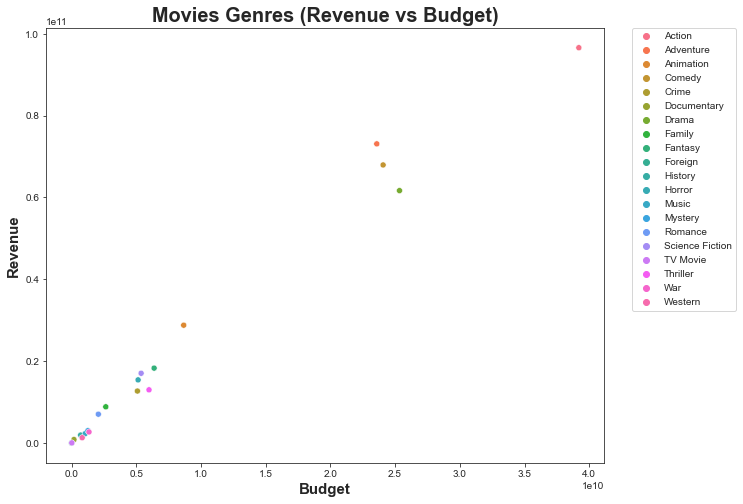

In [55]:
# set chart dimension
plt.figure(figsize=(10,8))

# set plotting style
sns.set_style('ticks')

# set title
plt.title('Movies Genres (Revenue vs Budget)', fontweight='bold', size=20)
plt.xlabel('Budget', fontweight='bold', size=15)
plt.ylabel('Revenue', fontweight='bold', size=15)

# draw scatter plot
sns.scatterplot(x="budget", y="revenue", hue="genres", data=rev1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.); # used to move the legend outside the chart

*This shows there's a strong positive correlation of **0.734928** between revenue and budget*

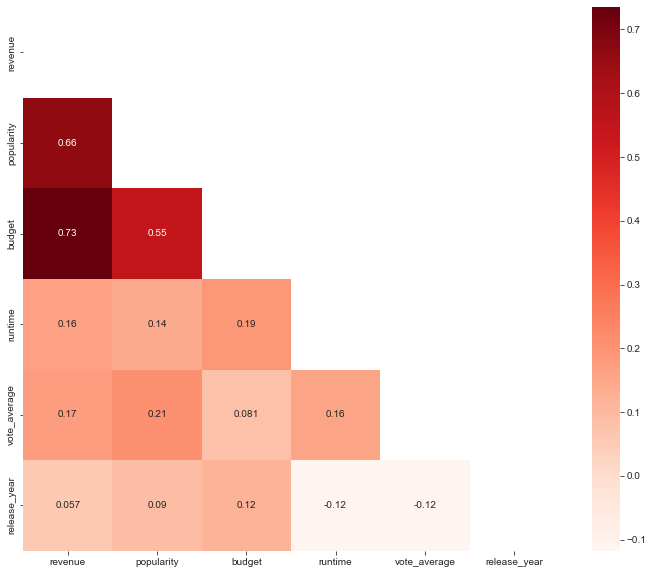

In [57]:
# plotting a heatmap
fig = plt.figure(figsize =(12, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(info_rev.corr())

#Plotting the heatmap
sns.heatmap(info_rev.corr(), annot =True,  mask =matrix, cmap="Reds");
